## Clinton Emails

In [18]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%autosave 120
pd.set_option('display.max_colwidth', 900)

Autosaving every 120 seconds


In [19]:
emails = pd.read_csv('data/Hillary-clinton-emails/Emails.csv')
emails = emails.dropna(subset=['ExtractedBodyText'])
cols = [col for col in emails.columns if 
        col.startswith('Extr') or col=='RawText']
emails = emails[cols]

In [20]:
emails.head(4)

,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
1,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\nMarch 3, 2011\nFor: Hillary","UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739546\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\nRELEASE IN\nPART B6\nFrom:\nSent:\nTo:\nSubject:\nAttachments:\nB6\nThursday, March 3, 2011 9:45 PM\nH: Latest How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx\nCONFIDENTIAL\nMarch 3, 2011\nFor: Hillary\nFrom: Sid\nRe: Syria aiding Qaddafi\nThis memo has two parts. Part one is the report that Syria is providing air support for Qaddafi. Part two is a note\nto Cody from Lord David Owen, former UK foreign secretary on his views of an increasingly complex crisis. It\nseems that the situation is developing into a protracted civil war with various nations backing opposing sides\nwith un..."
2,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,"UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739547\nDate: 05/14/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\nRELEASE IN\nPART B6\nFrom: Mills, Cheryl D <MillsCD@state.gov>\nSent: Wednesday, September 12, 2012 11:52 AM\nTo: B6\nCc: Abedin, Huma\nSubject: Re: Chris Stevens\nThx\nOriginal Message\nFrom: Anne-Marie Slaughter [\nSent: Wednesday, September 12, 2012 07:46 AM\nTo: Ihdr22@clintonernail.com' <hdr22@clintonemail corn>\nCc: Abed in, Huma; Mills, Cheryl D\nSubject: Chris Stevens\nTo you and all my former colleagues, I'm so terribly sorry. Our FSOs stand on the front lines just as surely and devotedly\nas our soldiers do. Thinking of you and Pat and everyone this morning.\nAM\nUNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739547\nDa..."
4,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print.","B6\nUNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739554\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\nRELEASE IN\nPART B6\nFrom:\nSent:\nTo:\nSubject:\nAttachments:\nH <hrod17@clintonemail.com>\nFriday, March 11, 2011 1:36 PM\nHuma Abedin\nFw: H: Latest: How Syria is aiding Qaddafi and more... Sid\nhrc memo syria aiding libya 030311.docx\nPis print.\nFrom:\nSent: Thursday, March 03, 2011 09:45 PM\nTo: H\nSubject: H: Latest: How Syria is aiding Qaddafi and more... Sid\nCONFIDENTIAL\nMarch 3, 2011\nFor: Hillary\nFrom: Sid\nRe: Syria aiding Qaddafi\nThis memo has two parts. Part one is the report that Syria is providing air support for Qaddafi. Part two is a note\nto Cody from Lord David Owen, former UK foreign secretary on his views of an increasingly co..."
5,Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,"Pis print.\n-•-...-^\nH < hrod17@clintonernailcom>\nWednesday, September 12, 2012 2:11 PM\n°Russorv@state.gov'\nFw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots\nFrom [meat)\

In [21]:
NAN_VALUE = str(-999)
emails = emails.fillna(NAN_VALUE)

for col in emails.columns:
    if col.startswith('Extr'):
        emails[col] = emails[col].astype(str)

In [22]:
import re

DATE = '[A-Z][a-z]{5,}, [A-Z][a-z]{3,} [0-9]{1,2}, 201[0-9]( [0-9]{1,2}:[0-9]{1,2} [AP]M)?'
SHORT_DATE = '[A-Z][a-z]{3,}, [0-9]{1,2} [A-Z][a-z]{2} 201[0-9]'
TIME = '[0-9]{1,2}:[0-9]{1,2} [AP]M'
EMAIL_ADDRESS = '[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.?[a-zA-Z0-9-.]+'
EMAIL_FIELDS = '(Sent|Subject|From|Fw|Re|Cc|To|Attachments|Date):?'
ALL_UPPERCASE = '[A-Z]{2,}'
STATE_DEPT_TEXT = 'U.S. Department of State| Case No|Doc No|B5|B6'

In [27]:
def clean(text):
    text = re.sub('\n', ' ', text)
    text = re.sub(DATE, '', text)
    text = re.sub(SHORT_DATE, '', text)
    text = re.sub(TIME, '', text)
    text = re.sub(EMAIL_FIELDS, '', text)
    text = re.sub(EMAIL_ADDRESS, '', text)
    text = re.sub(ALL_UPPERCASE, '', text)
    text = re.sub(STATE_DEPT_TEXT, '', text)
    return text

emails['CleanText'] = emails.RawText.apply(clean)

In [28]:
def remove_extracted_field(text, field_value):
    if field_value == NAN_VALUE:
        return text
    return text.replace(str(field_value), '')

for col in emails.columns:
    if col.startswith('Extracted'):
        emails.CleanText =  emails.apply(lambda d: 
                                        remove_extracted_field(d.CleanText,
                                                     d[col]),
                                                    axis=1)

In [30]:
emails[['CleanText']].head(5)

,CleanText
1,". F-2015-04841 . C05739546 05/13/2015 . - . & . . H: Latest How Syria is aiding Qaddafi and more... Sid hrc memo syria aiding libya 030311.docx; hrc memo syria aiding libya 030311.docx March 3, 2011 For: Hillary Sid Syria aiding Qaddafi This memo has two parts. Part one is the report that Syria is providing air support for Qaddafi. Part two is a note to Cody from Lord David Owen, former foreign secretary on his views of an increasingly complex crisis. It seems that the situation is developing into a protracted civil war with various nations backing opposing sides with unforeseen consequences. Under these circumstances the crucial challenge is to deprive Qaddafi of his strategic depth—his support both financial and military. I. port During the afternoon of March 3, advisers to Muammar Qaddafi stated privately that the Libyan Leader has decided that civil..."
2,". F-2015-04841 . C05739547 05/14/2015 . - . & . . Mills, Cheryl D <> Abedin, Huma Chris Stevens Thx Original Message Anne-Marie Slaughter [ ' < corn> Abed in, Huma; Mills, Cheryl D Chris Stevens you and all my former colleagues, I'm so terribly sorry. Our s stand on the front lines just as surely and devotedly as our soldiers do. Thinking of you and Pat and everyone this morning. . F-2015-04841 . C05739547 05/14/2015 . - . & . . -50045248"
4,". F-2015-04841 . C05739554 05/13/2015 . - . & . . H <> Huma Abedin H: Latest: How Syria is aiding Qaddafi and more... Sid hrc memo syria aiding libya 030311.docx Pis print. H H: Latest: How Syria is aiding Qaddafi and more... Sid March 3, 2011 For: Hillary Sid Syria aiding Qaddafi This memo has two parts. Part one is the report that Syria is providing air support for Qaddafi. Part two is a note to Cody from Lord David Owen, former foreign secretary on his views of an increasingly complex crisis. It seems that the situation is developing into a protracted civil war with various nations backing opposing sides with unforeseen consequences. Under these circumstances the crucial challenge is to deprive Qaddafi of his strategic depth—his support both financial and military. I. port During the afternoon of March 3, advisers to Muammar Qaddafi stated priv..."
5,. F-2015-04841 . C05739559 05/13/2015 . - . & . . Pis print. -•-...-^ H < > °' Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots [meat) 11 Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked- deadly-riots/ from my Verizon Wireless 4G . F-2015-04841 . C05739559 05/13/2015 . - . & . . -50045251
7,". F-2015-04841 . C05739561 05/13/2015 . - . & . . H <> Huma Abedin H: Latest: How Syria is aiding Qaddafi and more... Sid hrc memo Syria aiding libya 030311.docx Pis print. H H: Latest: How Syria is aiding Qaddafi and more... Sid March 3, 2011 For: Hillary Sid Syria aiding Qaddafi This memo has two parts. Part one is the report that Syria is providing air support for Qaddafi. Part two is a note to Cody from Lord David Owen, former foreign secretary on his views of an increasingly complex crisis. It seems that the situation is developing into a protracted civil war with various nations backing opposing sides with unforeseen consequences. Under these circumstances the crucial challenge is to deprive Qaddafi of his strategic depth--his support both financial and military. I. port During the afternoon of March 3, advisers to Muammar Qaddafi stated pri..."


## LDA

In [32]:
from gensim.parsing.preprocessing import preprocess_string

email_documents = emails.CleanText.apply(preprocess_string).tolist()

In [37]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

dictionary = corpora.Dictionary(email_documents)
corpus = [dictionary.doc2bow(text) for text in email_documents]

In [ ]:
NUM_TOPICS = 8
ldamodel = LdaModel(corpus, 
                    num_topics = NUM_TOPICS, 
                    id2word=dictionary, passes=15)

In [12]:
ldamodel.print_topics(num_words=6)

[(0,
  '0.049*"messag" + 0.046*"origin" + 0.018*"cheryl" + 0.015*"sullivan" + 0.015*"abedin" + 0.014*"mill"'),
 (1,
  '0.011*"govern" + 0.010*"libya" + 0.010*"sourc" + 0.009*"libyan" + 0.008*"minist" + 0.007*"state"'),
 (2,
  '0.013*"said" + 0.012*"obama" + 0.010*"senat" + 0.010*"parti" + 0.008*"presid" + 0.007*"hous"'),
 (3,
  '0.031*"haiti" + 0.012*"haitian" + 0.008*"govern" + 0.007*"report" + 0.007*"said" + 0.006*"children"'),
 (4,
  '0.018*"secretari" + 0.016*"offic" + 0.013*"state" + 0.010*"depart" + 0.008*"foreign" + 0.008*"room"'),
 (5,
  '0.014*"clinton" + 0.010*"secretari" + 0.009*"presid" + 0.008*"said" + 0.008*"state" + 0.005*"right"'),
 (6,
  '0.008*"american" + 0.007*"state" + 0.006*"govern" + 0.005*"new" + 0.005*"israel" + 0.004*"presid"'),
 (7,
  '0.009*"work" + 0.007*"develop" + 0.006*"women" + 0.006*"state" + 0.006*"new" + 0.005*"year"')]

In [65]:
from gensim.models.coherencemodel import CoherenceModel

def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, 
                                     texts=documents, 
                                     dictionary=dictionary, 
                                     coherence='c_v')
    return coherence_model.get_coherence()

def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = LdaModel(corpus, 
                    num_topics = num_topics, 
                    id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(email_documents, 
                                              dictionary, 
                                              ldamodel)
        yield coherence

In [66]:
min_topics, max_topics = 2,30
coherence_scores = list(get_coherence_values(min_topics, max_topics))


Calculating coherence for 2 topics

Calculating coherence for 3 topics

Calculating coherence for 4 topics

Calculating coherence for 5 topics

Calculating coherence for 6 topics

Calculating coherence for 7 topics

Calculating coherence for 8 topics

Calculating coherence for 9 topics

Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics

Calculating coherence for 14 topics

Calculating coherence for 15 topics

Calculating coherence for 16 topics

Calculating coherence for 17 topics

Calculating coherence for 18 topics

Calculating coherence for 19 topics

Calculating coherence for 20 topics

Calculating coherence for 21 topics

Calculating coherence for 22 topics

Calculating coherence for 23 topics

Calculating coherence for 24 topics

Calculating coherence for 25 topics

Calculating coherence for 26 topics

Calculating coherence for 27 topics

Calculating coherence for 28 topics

Calculat

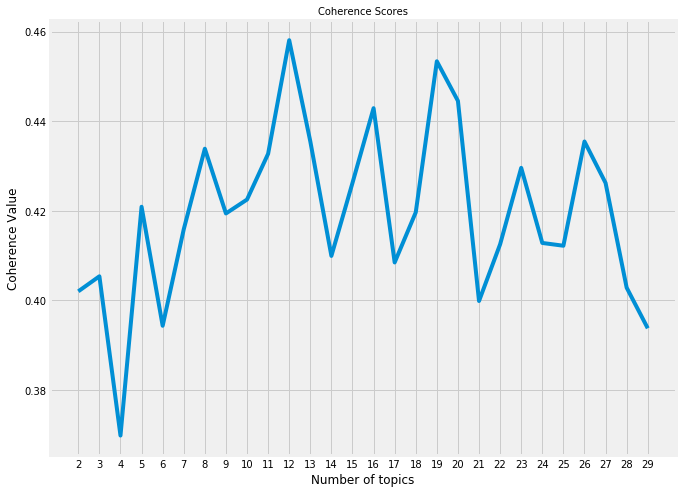

In [67]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.ticker import MaxNLocator

style.use('fivethirtyeight')

%matplotlib inline

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,8))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=10);

#plt.xaxis.set_major_locator(MaxNLocator(integer=True))

In [60]:
plt.title??